In [1]:
import json
import requests
import csv

**<font size=5 >Step1: Data acquisition</font>**

Gather the raw data from two APIs:  

1.The Legacy Pagecounts API provides access to desktop and mobile traffic data from December 2007 through July 2016.  

2.The Pageviews API provides access to desktop, mobile web, and mobile app traffic data from July 2015 through last month.


In [2]:
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [3]:
# parameters for getting aggregated legacy desktop-site view data
params_legacy_desktop = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2007010100",
                # for end use 1st day of month following final month of data
                 "end" : "2016080100"
                    }

# parameters for getting aggregated legacy mobile-site view data
params_legacy_mobile = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2007010100",
                 "end" : "2016080100"
                    }

#parameters for getting aggregated current standard pageview desktop data
params_pageviews_desktop = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2021101000'
                        }

#parameters for getting aggregated current standard pageview mobile-app data
params_pageviews_mobileapp = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2021101000'
                        }

#parameters for getting aggregated current standard pageview mobile-web data
params_pageviews_mobileweb = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2021101000'
                        }

In [4]:
headers = {
    'User-Agent': 'https://github.com/SherryL-star',
    'From': 'sherrylx@uw.edu'
}

In [5]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [6]:
legacy_desktop = api_call(endpoint_legacy, params_legacy_desktop)
legacy_mobile = api_call(endpoint_legacy, params_legacy_mobile)
pageviews_desktop= api_call(endpoint_pageviews, params_pageviews_desktop)
pageviews_mobileapp= api_call(endpoint_pageviews, params_pageviews_mobileapp)
pageviews_mobileweb= api_call(endpoint_pageviews, params_pageviews_mobileweb)

In [25]:
with open('pagecounts_desktop-site_200701-201607.json','w') as f:
    json.dump(legacy_desktop,f)

with open('pagecounts_mobile-site_200701-201607.json','w') as f:
    json.dump(legacy_mobile,f)

with open('pageviews_desktop_201507-202109.json','w') as f:
    json.dump(pageviews_desktop,f)
    
with open('pageviews_mobile-app_201507-202109.json','w') as f:
    json.dump(pageviews_mobileapp,f)

with open('pageviews_mobile-web_201507-202109.json','w') as f:
    json.dump(pageviews_mobileweb,f)

**<font size=5 >Step2: Data processing</font>**  
In this step, I merged the 5 .json files and combined them into one .csv file

In [14]:
import pandas as pd
from pandas import json_normalize

convert .json file to dataframe

In [25]:
# legacy_pagecount
with open('pagecounts_desktop-site_200701-201607.json','r') as f:
    data1 = json.loads(f.read())
df_legacy_desktop = pd.json_normalize(data1, record_path =['items'])

with open('pagecounts_mobile-site_200701-201607.json','r') as f:
    data2 = json.loads(f.read())
df_legacy_mobile = pd.json_normalize(data2, record_path =['items'])


#pageview
with open('pageviews_desktop_201507-202109.json','r') as f:
    data3 = json.loads(f.read())
df_pageview_desktop = pd.json_normalize(data3, record_path =['items'])

with open('pageviews_mobile-app_201507-202109.json','r') as f:
    data4 = json.loads(f.read())
df_pageview_mobileapp = pd.json_normalize(data4, record_path =['items'])

with open('pageviews_mobile-web_201507-202109.json','r') as f:
    data5 = json.loads(f.read())
df_pageview_mobileweb = pd.json_normalize(data5, record_path =['items'])


In [56]:
#data sample preview
print(df_pageview_mobileweb)

         project      access agent granularity   timestamp       views
0   en.wikipedia  mobile-web  user     monthly  2015070100  3179131148
1   en.wikipedia  mobile-web  user     monthly  2015080100  3192663889
2   en.wikipedia  mobile-web  user     monthly  2015090100  3073981649
3   en.wikipedia  mobile-web  user     monthly  2015100100  3173975355
4   en.wikipedia  mobile-web  user     monthly  2015110100  3142247145
..           ...         ...   ...         ...         ...         ...
70  en.wikipedia  mobile-web  user     monthly  2021050100  4810094479
71  en.wikipedia  mobile-web  user     monthly  2021060100  4433805793
72  en.wikipedia  mobile-web  user     monthly  2021070100  4617448266
73  en.wikipedia  mobile-web  user     monthly  2021080100  4570812807
74  en.wikipedia  mobile-web  user     monthly  2021090100  4223914121

[75 rows x 6 columns]


In order to make the list more concise, I just take two specific columns：'timestamp' and 'views' and reshape them into a new dataframe. In addition, replace 'NaN' with the value of 0

In [49]:
# legacy 
monthly_legacy_desktop = pd.DataFrame(df_legacy_desktop, columns=['timestamp', 'count'])
monthly_legacy_desktop = monthly_legacy_desktop.fillna(0)

monthly_legacy_mobile = pd.DataFrame(df_legacy_mobile, columns=['timestamp', 'count'])
monthly_legacy_mobile = monthly_legacy_mobile.fillna(0)

#pageview
monthly_pageview_desktop = pd.DataFrame(df_pageview_desktop, columns=['timestamp', 'views'])
monthly_pageview_desktop = monthly_pageview_desktop.fillna(0)

monthly_pageview_mobileapp = pd.DataFrame(df_pageview_mobileapp, columns=['timestamp', 'views'])
monthly_pageview_mobileapp = monthly_pageview_mobileapp.fillna(0)

monthly_pageview_mobileweb = pd.DataFrame(df_pageview_mobileweb, columns=['timestamp', 'views'])
monthly_pageview_mobileweb = monthly_pageview_mobileweb.fillna(0)

In [62]:
#data sample preview 
print(monthly_legacy_mobile)

     timestamp       count
0   2014100100  3091546685
1   2014110100  3027489668
2   2014120100  3278950021
3   2015010100  3485302091
4   2015020100  3091534479
5   2015030100  3330832588
6   2015040100  3222089917
7   2015050100  3334069483
8   2015060100  3038162463
9   2015070100  3254472695
10  2015080100  3268487582
11  2015090100  3172429827
12  2015100100  3246082505
13  2015110100  3218234512
14  2015120100  3387411863
15  2016010100  3739628742
16  2016020100  3333231392
17  2016030100  3419853636
18  2016040100  3301385124
19  2016050100  3418435805
20  2016060100  3372618063
21  2016070100  3500661121


Combine the monthly values for mobile-app and mobile-web to create a total mobile traffic count for each month.

In [42]:
monthly_pageview_mobileall = monthly_pageview_mobileapp.set_index('timestamp').add(monthly_pageview_mobileweb.set_index('timestamp'), fill_value=0).reset_index()

In [43]:
print(monthly_pageview_mobileall)

     timestamp       views
0   2015070100  3288755294
1   2015080100  3302333038
2   2015090100  3170203333
3   2015100100  3268499132
4   2015110100  3236601070
..         ...         ...
70  2021050100  4976579558
71  2021060100  4584510417
72  2021070100  4778909421
73  2021080100  4732194000
74  2021090100  4373512692

[75 rows x 2 columns]


Calculate all views of pagecount and pageviews: add mobile and desktop together. 

In [57]:
monthly_pagecount_all = monthly_legacy_desktop.set_index('timestamp').add(monthly_legacy_mobile.set_index('timestamp'), fill_value=0).reset_index()

monthly_pageview_all = monthly_pageview_desktop.set_index('timestamp').add(monthly_pageview_mobileall.set_index('timestamp'), fill_value=0).reset_index()

In [93]:
print(monthly_pageview_all)

     timestamp       views
0   2015070100  7665421980
1   2015080100  7634815221
2   2015090100  7655695037
3   2015100100  7746031887
4   2015110100  7524321290
..         ...         ...
70  2021050100  7800995735
71  2021060100  7090481783
72  2021070100  7544493789
73  2021080100  7495607934
74  2021090100  7060156893

[75 rows x 2 columns]


In [94]:
monthly_pagecount_all.rename(columns={'count':'pagecount_all_views'}, inplace = True)
monthly_legacy_desktop.rename(columns={'count':'pagecount_desktop_views'}, inplace = True)
monthly_legacy_mobile.rename(columns={'count':'pagecount_mobile_views'}, inplace = True)
monthly_pageview_all.rename(columns={'views':'pageview_all_views'}, inplace = True)
monthly_pageview_desktop.rename(columns={'views':'pageview_desktop_views'}, inplace = True)
monthly_pageview_mobileall.rename(columns={'views':'pageview_mobile_views'}, inplace = True)

Combine all six dataframe into one

In [95]:
df1 = pd.merge(monthly_pagecount_all,monthly_legacy_desktop, how='outer', on='timestamp')

In [96]:
df2 = pd.merge(df1,monthly_legacy_mobile, how='outer', on='timestamp')

In [97]:
df3 = pd.merge(df2,monthly_pageview_all, how='outer', on='timestamp')

In [98]:
df4 = pd.merge(df3,monthly_pageview_desktop, how='outer', on='timestamp')

In [99]:
df_final = pd.merge(df4,monthly_pageview_mobileall, how='outer', on='timestamp')
df_final = df_final.fillna(0)

In [100]:
print(df_final)

      timestamp  pagecount_all_views  pagecount_desktop_views  \
0    2007120100         2.998332e+09             2.998332e+09   
1    2008010100         4.930903e+09             4.930903e+09   
2    2008020100         4.818394e+09             4.818394e+09   
3    2008030100         4.955406e+09             4.955406e+09   
4    2008040100         5.159162e+09             5.159162e+09   
..          ...                  ...                      ...   
161  2021050100         0.000000e+00             0.000000e+00   
162  2021060100         0.000000e+00             0.000000e+00   
163  2021070100         0.000000e+00             0.000000e+00   
164  2021080100         0.000000e+00             0.000000e+00   
165  2021090100         0.000000e+00             0.000000e+00   

     pagecount_mobile_views  pageview_all_views  pageview_desktop_views  \
0                       0.0        0.000000e+00            0.000000e+00   
1                       0.0        0.000000e+00            0.000000e+

Seperate 'temestamp' into 'Year' and 'Month'

In [101]:
def DateSplit(df, col):
    """
    split the object of 'timestamp' into year(YYYY) and month(MM).
    :param df:  to operate data （type：DataFrame）
    :param col: column label of date object （type：str）
    :return: converted date （type： DataFrame）
    """
    year, month = [], []
    data = df.loc[:, col].values
    df = df.drop([col], axis=1)
    
    for i in range(data.shape[0]):
        year.append(int(data[i][:4]))
        month.append(int(data[i][4:6]))
       
    date = pd.DataFrame({'year': year, 'month': month})
    result = pd.concat([date, df], axis=1)
    return result

In [102]:
data= DateSplit(df=df_final,col='timestamp')
data.head(100)

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
0,2007,12,2.998332e+09,2.998332e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,2008,1,4.930903e+09,4.930903e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,2008,2,4.818394e+09,4.818394e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,2008,3,4.955406e+09,4.955406e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,2008,4,5.159162e+09,5.159162e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
95,2015,11,8.515191e+09,5.296956e+09,3.218235e+09,7.524321e+09,4.287720e+09,3.236601e+09
96,2015,12,8.651858e+09,5.264446e+09,3.387412e+09,7.476287e+09,4.100012e+09,3.376275e+09
97,2016,1,9.309261e+09,5.569633e+09,3.739629e+09,8.154016e+09,4.436179e+09,3.717837e+09
98,2016,2,8.680941e+09,5.347709e+09,3.333231e+09,7.585859e+09,4.250997e+09,3.334862e+09


Combine all data into a single CSV file

In [103]:
data.to_csv('en-wikipedia_traffic_200712-202108.csv')

**<font size=5 >Step3: Analysis</font>**  
A time series graph shows the trend of Wikipedia's pageview and pagecount from the end of 2017 to September 2021 and a brief analysis

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
#df_final.replace(np.nan,0)

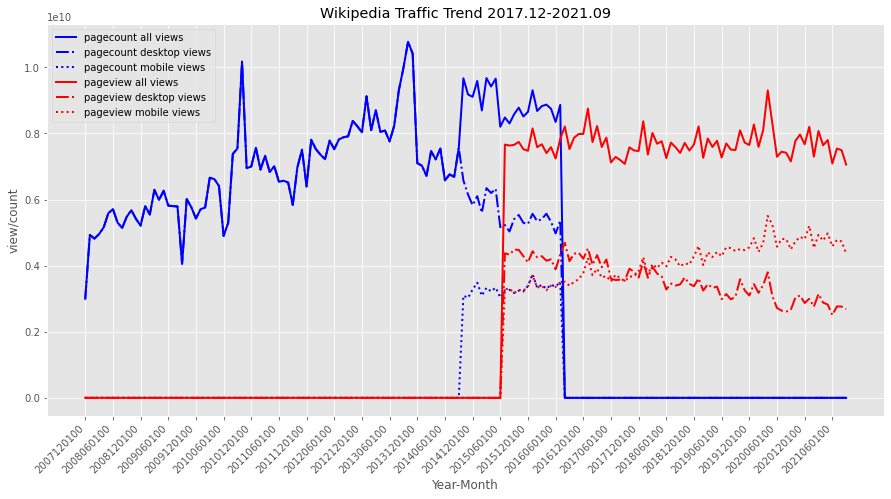

In [145]:
plt.style.use('ggplot')
fig=plt.figure(figsize = (15,8))

plt.plot(df_final.timestamp,
        df_final.pagecount_all_views,
        linestyle = '-',
        linewidth = 2,
        color = 'blue',
        label='pagecount all views')

plt.plot(df_final.timestamp,
        df_final.pagecount_desktop_views,
        linestyle = '-.',
        linewidth = 2,
        color = 'blue',
        label='pagecount desktop views')

plt.plot(df_final.timestamp,
        df_final.pagecount_mobile_views,
        linestyle = ':',
        linewidth = 2,
        color = 'blue',
        label='pagecount mobile views')

plt.plot(df_final.timestamp,
        df_final.pageview_all_views,
        linestyle = '-',
        linewidth = 2,
        color = 'red',
        label='pageview all views')

plt.plot(df_final.timestamp,
        df_final.pageview_desktop_views,
        linestyle = '-.',
        linewidth = 2,
        color = 'red',
        label='pageview desktop views')

plt.plot(df_final.timestamp,
        df_final.pageview_mobile_views,
        linestyle = ':',
        linewidth = 2,
        color = 'red',
        label='pageview mobile views')

plt.title('Wikipedia Traffic Trend 2017.12-2021.09')
plt.xlabel('Year-Month')
plt.ylabel('view/count')
plt.xticks(range(0,166,6))
fig.autofmt_xdate(rotation = 45)
plt.legend()

plt.savefig('Result Image.png')

plt.show()

Analysis:  
As can be seen from the graph above, the total number of Wikipedia pagecounts or pageviews has flattened since 2015, maintaining a monthly average of 7 billion to 9 billion, while before 2015, it fluctuated greatly.   
Since the mobile data became available in 2014, the number of views from mobile users has been on the rise, while desktop views have shown a continuous downward trend.